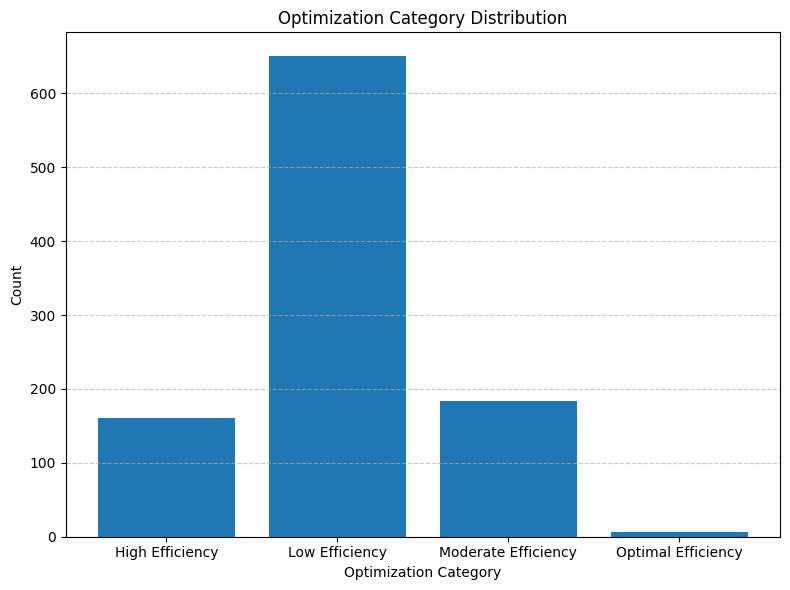

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 불러오기
df = pd.read_csv("hybrid_manufacturing_categorical.csv")

# 'Optimization_Category' 컬럼의 값 개수 세기
category_counts = df['Optimization_Category'].value_counts().sort_index()

# 바 플롯 그리기
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index.astype(str), category_counts.values)
plt.title('Optimization Category Distribution')
plt.xlabel('Optimization Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 1. 기계 가용성(Machine_Availability)이 높을수록 최적화 수준(Optimization_Category)이 높을 것이다.

<ipython-input-42-52c3562fc588>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Optimization_Category', y='Machine_Availability', data=df, palette=palette)


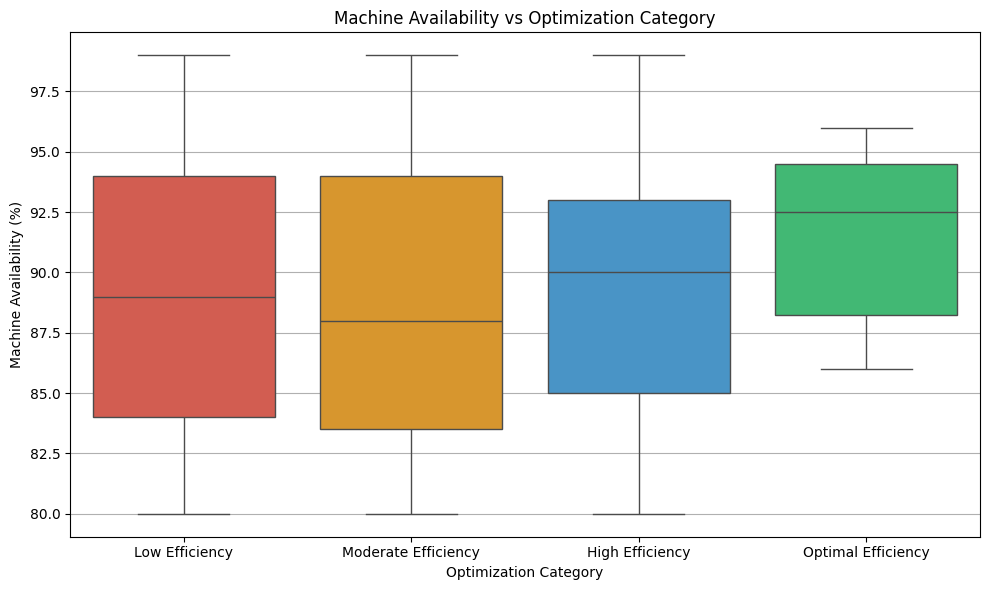

In [42]:
# 범주 순서 설정
category_order = ["Low Efficiency", "Moderate Efficiency", "High Efficiency", "Optimal Efficiency"]
df['Optimization_Category'] = pd.Categorical(df['Optimization_Category'], categories=category_order, ordered=True)

# 박스플롯 색상 추가
plt.figure(figsize=(10, 6))
palette = {
    "Low Efficiency": "#e74c3c",      # 붉은색
    "Moderate Efficiency": "#f39c12", # 주황색
    "High Efficiency": "#3498db",     # 파란색
    "Optimal Efficiency": "#2ecc71"   # 녹색
}
sns.boxplot(x='Optimization_Category', y='Machine_Availability', data=df, palette=palette)
plt.title('Machine Availability vs Optimization Category')
plt.xlabel('Optimization Category')
plt.ylabel('Machine Availability (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### 2. 에너지 소비량(Energy_Consumption)이 많을수록 최적화 수준이 낮을 것이다.

<ipython-input-43-4b9a49844141>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Optimization_Category', y='Energy_Consumption', data=df, palette=palette)


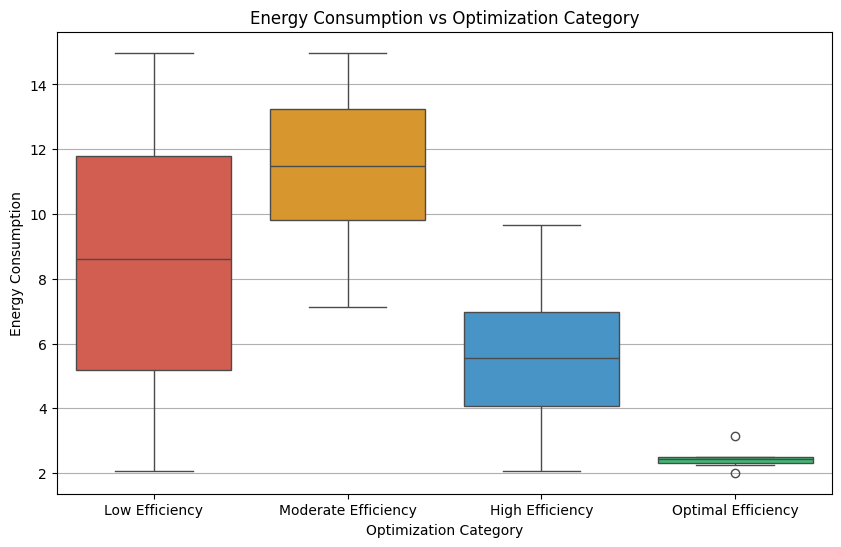

In [43]:
# Optimization_Category를 순서 있는 범주형으로 변환
category_order = ["Low Efficiency", "Moderate Efficiency", "High Efficiency", "Optimal Efficiency"]
df['Optimization_Category'] = pd.Categorical(df['Optimization_Category'], categories=category_order, ordered=True)

# 박스플롯 그리기 (에너지 소비량 vs 최적화 범주)
plt.figure(figsize=(10, 6))
palette = {
    "Low Efficiency": "#e74c3c",      # 붉은색
    "Moderate Efficiency": "#f39c12", # 주황색
    "High Efficiency": "#3498db",     # 파란색
    "Optimal Efficiency": "#2ecc71"   # 녹색
}
sns.boxplot(x='Optimization_Category', y='Energy_Consumption', data=df, palette=palette)
plt.title('Energy Consumption vs Optimization Category')
plt.xlabel('Optimization Category')
plt.ylabel('Energy Consumption')
plt.grid(axis='y')  # y축에만 그리드 표시
plt.show()


### 3. 가공 시간(Processing_Time)이 길수록 최적화 수준이 낮을 것이다.

<ipython-input-44-351ebfd0650d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Optimization_Category', y='Processing_Time', data=df, palette=palette)


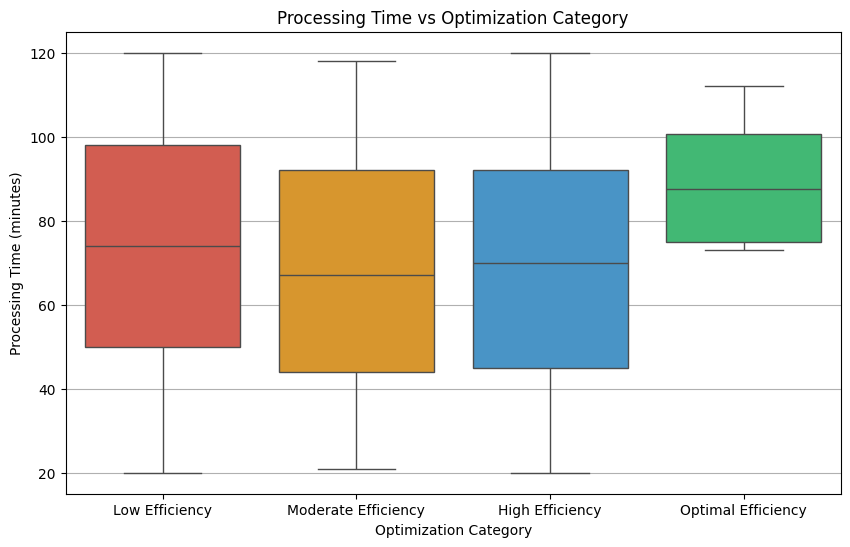

In [44]:
# Optimization_Category를 순서 있는 범주형으로 변환
category_order = ["Low Efficiency", "Moderate Efficiency", "High Efficiency", "Optimal Efficiency"]
df['Optimization_Category'] = pd.Categorical(df['Optimization_Category'], categories=category_order, ordered=True)

# 박스플롯 그리기 (Processing_Time vs Optimization_Category)
plt.figure(figsize=(10, 6))
palette = {
    "Low Efficiency": "#e74c3c",      # 붉은색
    "Moderate Efficiency": "#f39c12", # 주황색
    "High Efficiency": "#3498db",     # 파란색
    "Optimal Efficiency": "#2ecc71"   # 녹색
}
sns.boxplot(x='Optimization_Category', y='Processing_Time', data=df, palette=palette)
plt.title('Processing Time vs Optimization Category')
plt.xlabel('Optimization Category')
plt.ylabel('Processing Time (minutes)')
plt.grid(axis='y')  # y축에만 그리드 표시
plt.show()


### 4. 작업 종류(Operation_Type)에 따라 최적화 수준에 차이가 있을 것이다.

<ipython-input-46-4bd9a136d8c7>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Operation_Type', 'Optimization_Category'])


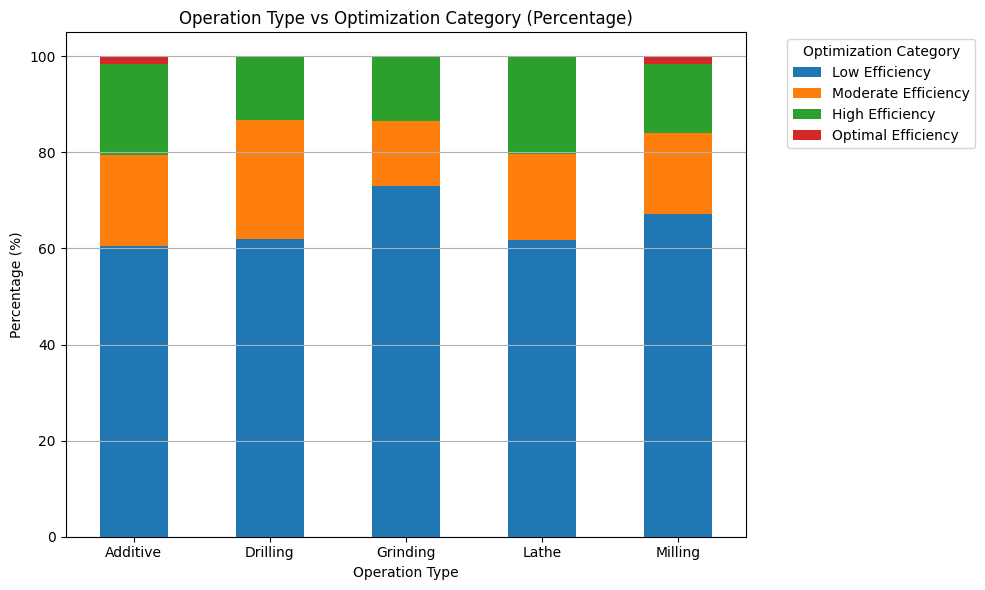

In [46]:
# 범주 순서 지정
category_order = ["Low Efficiency", "Moderate Efficiency", "High Efficiency", "Optimal Efficiency"]
df['Optimization_Category'] = pd.Categorical(df['Optimization_Category'], categories=category_order, ordered=True)

# 작업 종류별 최적화 범주 비율 계산 (멀티 인덱스 방지)
ratio = (
    df.groupby(['Operation_Type', 'Optimization_Category'])
    .size()
    .reset_index(name='count')  # 인덱스 초기화
)

# 비율 계산
ratio['percentage'] = ratio['count'] / ratio.groupby('Operation_Type')['count'].transform('sum') * 100

# 피벗 테이블 생성
ratio_pivot = ratio.pivot(index='Operation_Type', columns='Optimization_Category', values='percentage').fillna(0)

# 비율 누적 막대그래프 시각화
ax = ratio_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_title('Operation Type vs Optimization Category (Percentage)')
ax.set_xlabel('Operation Type')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Optimization Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
